In [1]:
import easyocr
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
data_path = './images'
path = './images/anpr1-20230228-002046.045.jpg'

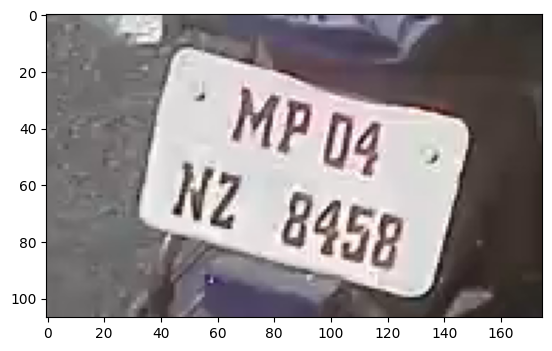

In [3]:
imgcv = cv2.imread(path)
plt.imshow(imgcv)

In [4]:
# Load the EasyOCR model with default settings
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
# Load the dataset
dataset = []
for filename in os.listdir(data_path):
    img_path = os.path.join(data_path, filename)
    label = filename.split('.')[0] # assuming the filename contains the label
    dataset.append((img_path, label))


In [6]:
# Define a function to preprocess the images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (300, 75))
    return img


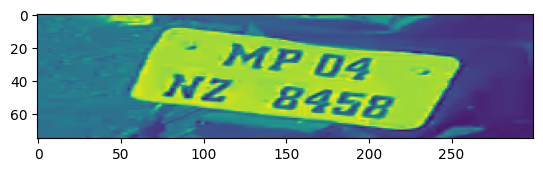

In [7]:
plt.imshow(preprocess_image(path))

In [8]:
# Preprocess the dataset
preprocessed_dataset = []
for data in dataset:
    img_path, label = data
    preprocessed_img = preprocess_image(path)
    preprocessed_dataset.append((preprocessed_img, label))


In [9]:
# Split the dataset into training and validation sets
np.random.shuffle(preprocessed_dataset)
train_size = int(len(preprocessed_dataset) * 0.8)
train_dataset = preprocessed_dataset[:train_size]
val_dataset = preprocessed_dataset[train_size:]


In [10]:
def labels_to_list(label):
    return [char for char in label]


In [11]:
def data_generator(dataset, batch_size):
    num_batches = len(dataset) // batch_size
    while True:
        np.random.shuffle(dataset)
        for i in range(num_batches):
            batch = dataset[i*batch_size:(i+1)*batch_size]
            batch_images = []
            batch_labels = []
            for data in batch:
                img, label = data
                batch_images.append(np.expand_dims(img, axis=-1))
                batch_labels.append(labels_to_list(label))
            yield np.array(batch_images), batch_labels

In [12]:
# Define the model architecture
model = easyocr.models.SimplifiedCRNN(input_shape=(75, 300, 1), num_classes=36, prediction_len=8)

# Define the training parameters
optimizer = 'adam'
batch_size = 32
epochs = 10

AttributeError: module 'easyocr' has no attribute 'models'

In [14]:
print(help(easyocr))

Help on package easyocr:

NAME
    easyocr

PACKAGE CONTENTS
    cli
    config
    craft
    craft_utils
    detection
    detection_db
    easyocr
    export
    imgproc
    model (package)
    recognition
    utils

VERSION
    1.6.2

FILE
    c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\easyocr\__init__.py


None


In [15]:
!pip install --upgrade easyocr


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip uninstall easyocr